# Logistic regression for multi-class classification

## import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [3]:
directory_data  = './data/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training image : 20000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 8000
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [4]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## vectorize image data

In [5]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## index for each class

In [6]:
index_train = {}
index_test  = {}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## plot data

In [7]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [8]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

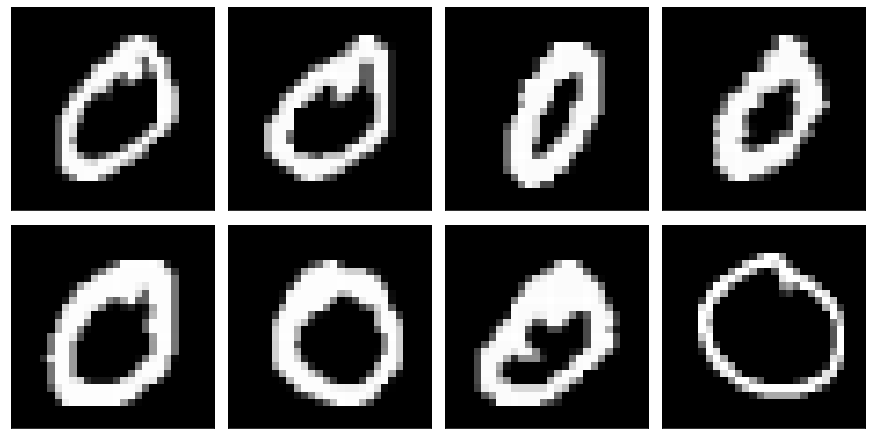

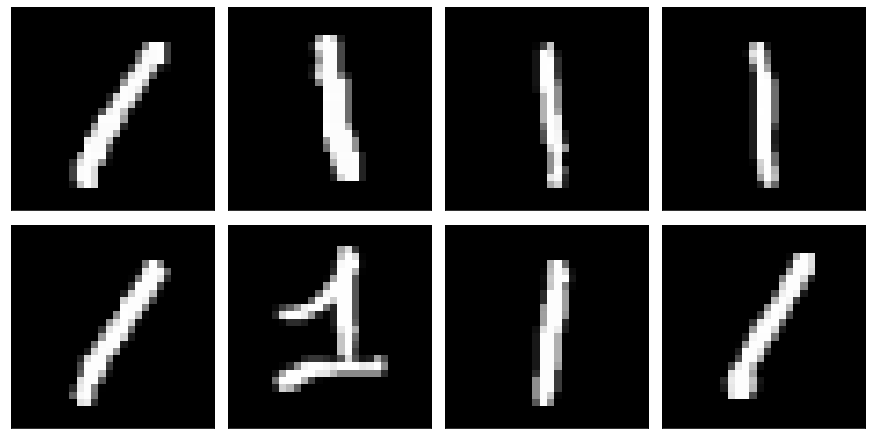

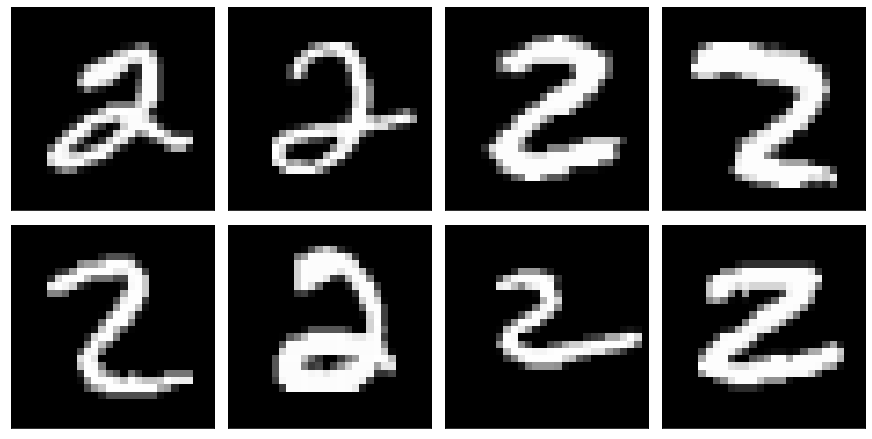

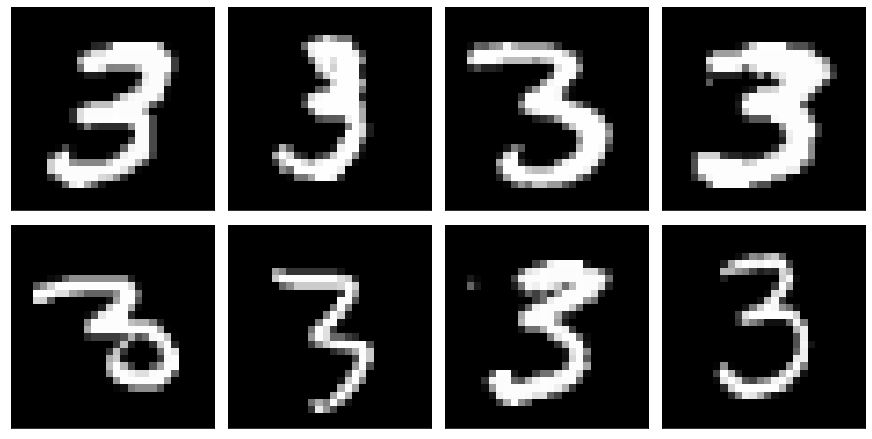

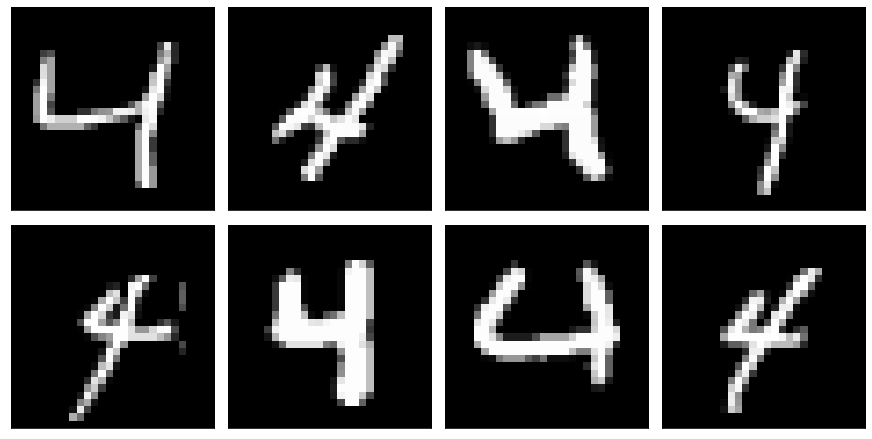

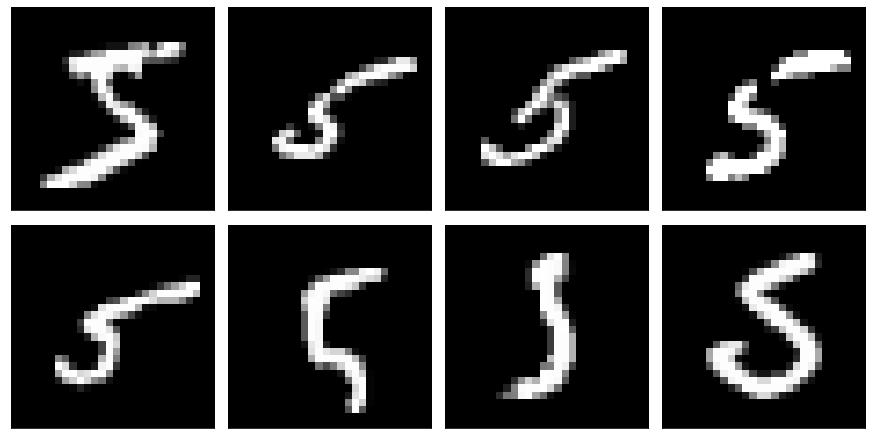

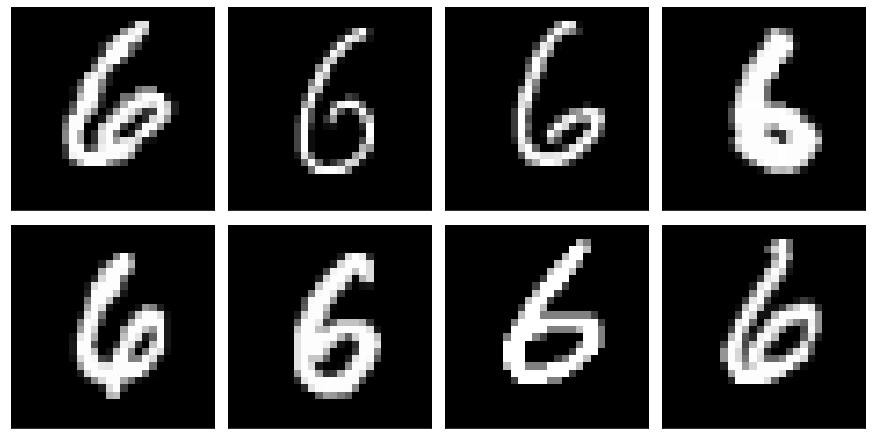

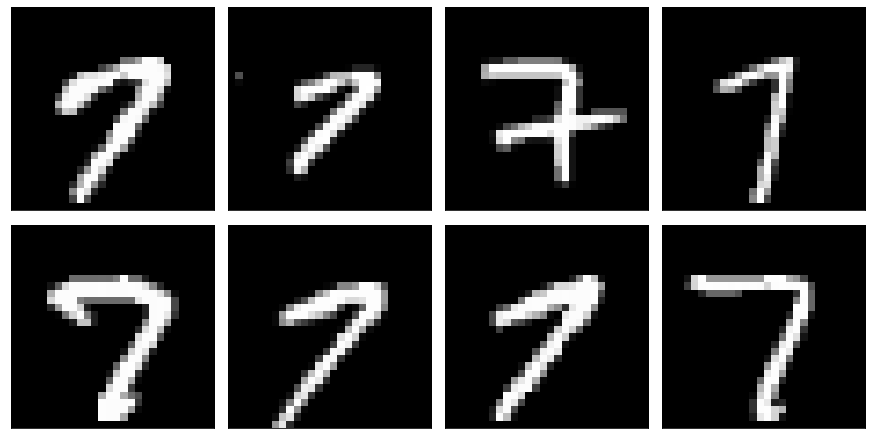

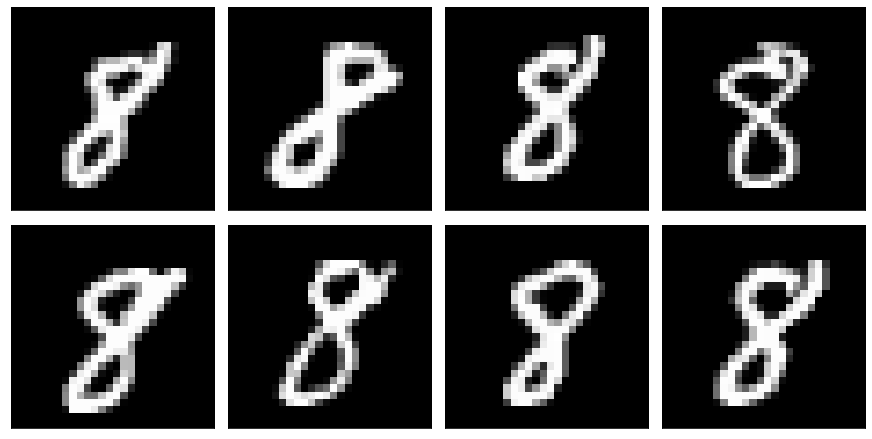

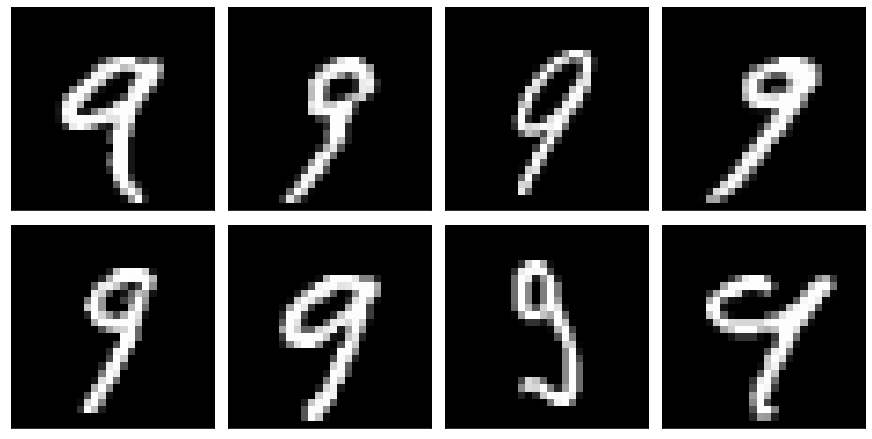

In [9]:
for i in range(nClass):

    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [10]:
def layer_linear(input, weight):

    output = np.dot(input, weight)

    return output

## Softmax function

In [11]:
def activation_softmax(input):
    max = np.max(input, axis=1,keepdims=True) #returns max of each row and keeps same dims
    e_x = np.exp(input - max) #subtracts each row with its max value
    sum = np.sum(e_x,axis=1,keepdims=True) #returns sum of each row and keeps same dims
    f_x = e_x / sum
     
    return f_x

## compute prediction by the forward propagation of the neural network

In [12]:
def compute_prediction(input, weight):

    output      = layer_linear(input, weight)
    prediction  = activation_softmax(output)

    return prediction

## compute loss for the cross-entropy term

In [13]:
def compute_loss_cross_entropy(prediction, label):
    delta = 1e-7
    loss = -np.sum(label * np.log(prediction+delta)) / label.shape[0] 
    return loss

## compute loss for the regularization term

In [14]:
def compute_loss_regularization(alpha, weight):
    
    loss = np.linalg(weight, ord=2)
    loss = (alpha / 2) * loss
    return loss

## compute loss function

In [15]:
def compute_loss(prediction, label, alpha, weight):

    loss = compute_loss_cross_entropy(prediction, label) + compute_loss_cross_entropy(alpha, weight)
    
    return loss

## compute gradient for the cross-entropy term

In [16]:
def compute_gradient_cross_entropy(input, prediction, label):
    batch_size = label.shape[0]
    gradient = (prediction - label) / batch_size 
    gradient = np.dot(input.T, gradient)
    
    return gradient

## compute gradient for the regularization term

In [17]:
def compute_gradient_regularization(alpha, weight):
    
    gradient = weight * alpha
    
    return gradient

## compute gradient

In [18]:
def compute_gradient(input, prediction, label, alpha, weight):

    gradient = compute_gradient_cross_entropy(input, prediction, label) + compute_gradient_regularization(alpha, weight) 

    return gradient

## compute accuracy

In [19]:
def compute_accuracy(prediction, label):
    a = np.argmax(prediction, axis=1)
    b = np.argmax(label, axis=1)
    bCorrect    = (a == b)
    accuracy    = np.sum(bCorrect) / len(label)
    
    return accuracy

## consider bias in the data

In [20]:

one_train   = np.ones((num_data_train, 1))
one_test    = np.ones((num_data_test, 1))

vector_x_train_bias = np.concatenate((vector_x_train, one_train), axis=1)
vector_x_test_bias  = np.concatenate((vector_x_test, one_test), axis=1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## construct model parameters and initialize them

In [21]:
def get_weight(dim_input, dim_output):
    
    weight = np.zeros((dim_input, dim_output))
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight[:dim_input-1, :] = 0.001
    weight[dim_input-1, :] = 1

    return weight

In [22]:
dim_input   = vector_x_train_bias.shape[1]
dim_output  =  nClass

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[:, 0])

dimension of the model parameters:  (785, 10)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

## hyper-parameters

In [23]:
number_iteration    = 1000
learning_rate       = 0.001

list_size_minibatch = [50, 100, 200]
list_weight_decay   = [0.001, 0.01, 0.1]

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## variables for optimization information for different minibatch

In [24]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_iteration))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_iteration))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_iteration))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_iteration))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_iteration))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_iteration))

## variables for optimization information for different weight decay

In [25]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_iteration))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_iteration))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_iteration))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_iteration))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_iteration))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_iteration))

## stochastic gradient descent iterations with different mini-batch (with alpha = 0)

In [29]:
# iteration for mini-batch
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   = int(num_data_train / size_minibatch)
    alpha           = 0

    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    dim_input   = vector_x_train_bias.shape[1]
    dim_output  =  nClass
    weight = get_weight(dim_input, dim_output)

    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j:j+size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, alpha, weight)
            weight      = weight - (learning_rate / size_minibatch) * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        if i % 100 == 0:
            print("epoch : ", i, "loss : ", np.average(loss_epoch))

        train_loss_mean_minibatch[k, i] = np.average(loss_epoch)
        train_loss_std_minibatch[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.average(accuracy_epoch)
        train_accuracy_std_minibatch[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_minibatch[k, i]       = loss_test
        test_accuracy_minibatch[k, i]   = accuracy_test

mini-batch size =  50, alpha = 0.000


  0%|          | 1/1000 [00:00<05:27,  3.05it/s]

epoch :  0 loss :  2.663263465773032


 10%|█         | 101/1000 [00:31<04:33,  3.29it/s]

epoch :  100 loss :  2.0495497167863332


 20%|██        | 201/1000 [01:01<04:14,  3.14it/s]

epoch :  200 loss :  1.711330350839946


 30%|███       | 301/1000 [01:33<03:45,  3.11it/s]

epoch :  300 loss :  1.5004546859181078


 40%|████      | 401/1000 [02:05<03:09,  3.17it/s]

epoch :  400 loss :  1.3567515957702125


 50%|█████     | 501/1000 [02:37<02:35,  3.22it/s]

epoch :  500 loss :  1.256317596872703


 60%|██████    | 601/1000 [03:08<02:03,  3.22it/s]

epoch :  600 loss :  1.1612658984770299


 70%|███████   | 701/1000 [03:41<01:36,  3.10it/s]

epoch :  700 loss :  1.0545756938511313


 80%|████████  | 801/1000 [04:13<01:02,  3.17it/s]

epoch :  800 loss :  1.102076108281354


 90%|█████████ | 901/1000 [04:45<00:32,  3.08it/s]

epoch :  900 loss :  1.0541377252985646


100%|██████████| 1000/1000 [05:17<00:00,  3.15it/s]


mini-batch size = 100, alpha = 0.000


  0%|          | 1/1000 [00:00<04:02,  4.12it/s]

epoch :  0 loss :  2.6671591519124704


 10%|█         | 101/1000 [00:25<03:42,  4.04it/s]

epoch :  100 loss :  2.471255450298898


 20%|██        | 201/1000 [00:50<03:19,  4.01it/s]

epoch :  200 loss :  2.334276491669258


 30%|███       | 301/1000 [01:15<03:03,  3.81it/s]

epoch :  300 loss :  2.1793505840602125


 40%|████      | 401/1000 [01:40<02:31,  3.96it/s]

epoch :  400 loss :  2.0497572247661795


 50%|█████     | 501/1000 [02:06<02:05,  3.98it/s]

epoch :  500 loss :  1.9471686726756912


 60%|██████    | 601/1000 [02:31<01:42,  3.90it/s]

epoch :  600 loss :  1.8178773950509624


 70%|███████   | 701/1000 [02:56<01:16,  3.90it/s]

epoch :  700 loss :  1.6989075336171595


 80%|████████  | 801/1000 [03:21<00:50,  3.98it/s]

epoch :  800 loss :  1.6789284312562598


 90%|█████████ | 901/1000 [03:47<00:25,  3.96it/s]

epoch :  900 loss :  1.6226810458315974


100%|██████████| 1000/1000 [04:12<00:00,  3.97it/s]


mini-batch size = 200, alpha = 0.000


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch :  0 

  0%|          | 1/1000 [00:00<03:57,  4.21it/s]

loss :  2.668451995363853


 10%|█         | 101/1000 [00:21<03:02,  4.92it/s]

epoch :  100 loss :  2.615672075394633


 20%|██        | 201/1000 [00:42<02:53,  4.60it/s]

epoch :  200 loss :  2.5755455114602164


 30%|███       | 301/1000 [01:04<02:37,  4.45it/s]

epoch :  300 loss :  2.5234010754393283


 40%|████      | 401/1000 [01:25<02:04,  4.80it/s]

epoch :  400 loss :  2.4753906550771267


 50%|█████     | 501/1000 [01:46<01:44,  4.78it/s]

epoch :  500 loss :  2.433365440241522


 60%|██████    | 601/1000 [02:07<01:26,  4.61it/s]

epoch :  600 loss :  2.3832377712354544


 70%|███████   | 701/1000 [02:28<01:01,  4.87it/s]

epoch :  700 loss :  2.3277714136230667


 80%|████████  | 801/1000 [02:50<00:41,  4.85it/s]

epoch :  800 loss :  2.307073283082281


 90%|█████████ | 901/1000 [03:10<00:21,  4.62it/s]

epoch :  900 loss :  2.267469207137478


100%|██████████| 1000/1000 [03:31<00:00,  4.72it/s]


## stochastic gradient descent iterations with different regularization parameter (weight decay) (with mini-batch size = 100)

In [30]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   = int(num_data_train / size_minibatch)
    alpha           = list_weight_decay[k]
    
    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    dim_input   = vector_x_train_bias.shape[1]
    dim_output  =  nClass
    weight = get_weight(dim_input, dim_output)

    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j:j+size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, alpha, weight)
            weight      = weight - (learning_rate / size_minibatch) * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        if i % 100 == 0:
            print("epoch : ", i, "loss : ", np.average(loss_epoch))

        train_loss_mean_weight_decay[k, i] = np.average(loss_epoch)
        train_loss_std_weight_decay[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.average(accuracy_epoch)
        train_accuracy_std_weight_decay[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_weight_decay[k, i]       = loss_test
        test_accuracy_weight_decay[k, i]   = accuracy_test


mini-batch size = 100, alpha = 0.001


  0%|          | 1/1000 [00:00<03:55,  4.25it/s]

epoch :  0 loss :  2.457841471408512


 10%|█         | 101/1000 [00:25<03:36,  4.15it/s]

epoch :  100 loss :  2.2619249344990893


 20%|██        | 201/1000 [00:49<03:25,  3.88it/s]

epoch :  200 loss :  2.1249562913479307


 30%|███       | 301/1000 [01:14<02:45,  4.24it/s]

epoch :  300 loss :  1.9700627953854386


 40%|████      | 401/1000 [01:39<02:29,  4.02it/s]

epoch :  400 loss :  1.8405115570120674


 50%|█████     | 501/1000 [02:04<02:01,  4.12it/s]

epoch :  500 loss :  1.7379668276718088


 60%|██████    | 601/1000 [02:29<01:46,  3.74it/s]

epoch :  600 loss :  1.6087421205207442


 70%|███████   | 701/1000 [02:54<01:15,  3.97it/s]

epoch :  700 loss :  1.489831578840655


 80%|████████  | 801/1000 [03:19<00:52,  3.79it/s]

epoch :  800 loss :  1.469877488244598


 90%|█████████ | 901/1000 [03:45<00:24,  4.06it/s]

epoch :  900 loss :  1.4136504576368818


100%|██████████| 1000/1000 [04:10<00:00,  4.00it/s]


mini-batch size = 100, alpha = 0.010


  0%|          | 1/1000 [00:00<04:30,  3.69it/s]

epoch :  0 loss :  2.405513818972253


 10%|█         | 101/1000 [00:25<03:44,  4.00it/s]

epoch :  100 loss :  2.2095864945680312


 20%|██        | 201/1000 [00:50<03:19,  4.00it/s]

epoch :  200 loss :  2.072815357518078


 30%|███       | 301/1000 [01:16<02:58,  3.92it/s]

epoch :  300 loss :  1.918317990028334


 40%|████      | 401/1000 [01:42<02:38,  3.77it/s]

epoch :  400 loss :  1.7892501188091041


 50%|█████     | 501/1000 [02:07<02:04,  4.01it/s]

epoch :  500 loss :  1.6872041571442018


 60%|██████    | 601/1000 [02:32<01:41,  3.94it/s]

epoch :  600 loss :  1.5586825674467417


 70%|███████   | 701/1000 [02:58<01:16,  3.93it/s]

epoch :  700 loss :  1.4404108350701474


 80%|████████  | 801/1000 [03:23<00:51,  3.87it/s]

epoch :  800 loss :  1.4207873234858033


 90%|█████████ | 901/1000 [03:48<00:24,  3.99it/s]

epoch :  900 loss :  1.3648513021749908


100%|██████████| 1000/1000 [04:13<00:00,  3.94it/s]


mini-batch size = 100, alpha = 0.100


  0%|          | 1/1000 [00:00<04:02,  4.11it/s]

epoch :  0 loss :  2.353181095501553


 10%|█         | 101/1000 [00:24<03:38,  4.11it/s]

epoch :  100 loss :  2.158085877244079


 20%|██        | 201/1000 [00:49<03:14,  4.11it/s]

epoch :  200 loss :  2.02420471851699


 30%|███       | 301/1000 [01:14<03:05,  3.77it/s]

epoch :  300 loss :  1.8745406101719493


 40%|████      | 401/1000 [01:39<02:25,  4.11it/s]

epoch :  400 loss :  1.751144479939643


 50%|█████     | 501/1000 [02:04<02:05,  3.98it/s]

epoch :  500 loss :  1.6549115478559469


 60%|██████    | 601/1000 [02:29<01:38,  4.03it/s]

epoch :  600 loss :  1.5341870948501548


 70%|███████   | 701/1000 [02:54<01:18,  3.79it/s]

epoch :  700 loss :  1.4231359514709034


 80%|████████  | 801/1000 [03:19<00:49,  4.00it/s]

epoch :  800 loss :  1.4076827945297774


 90%|█████████ | 901/1000 [03:44<00:24,  4.11it/s]

epoch :  900 loss :  1.3557127336153911


100%|██████████| 1000/1000 [04:09<00:00,  4.01it/s]


## plot curve

In [31]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [32]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [33]:
def plot_curve3(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [34]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [35]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve : mini-batch size = 50, weight decay = 0

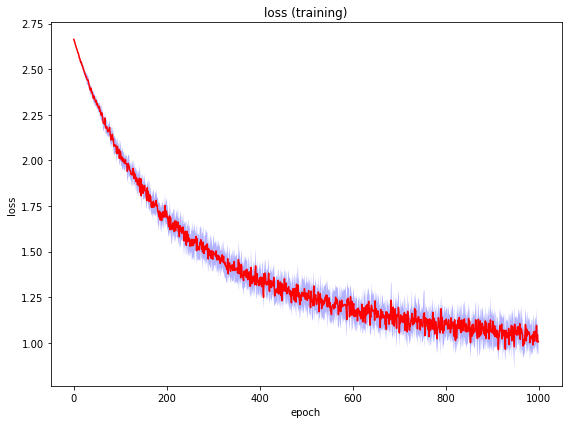

In [36]:
plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 100, weight decay = 0

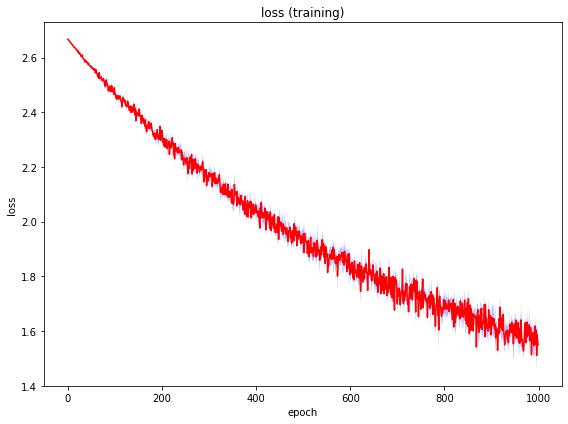

In [37]:
plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 200, weight decay = 0

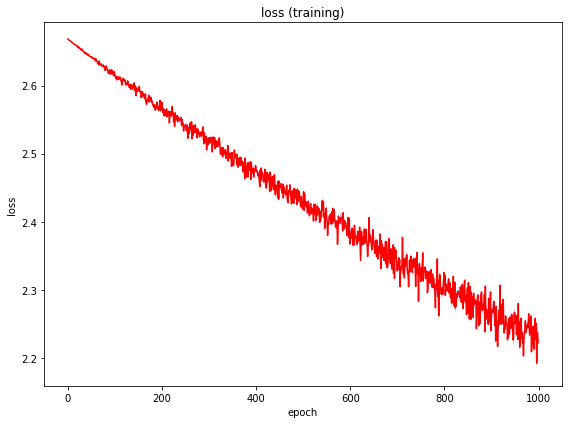

In [38]:
plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## accuracy (training) curve : mini-batch size = 50, weight decay = 0

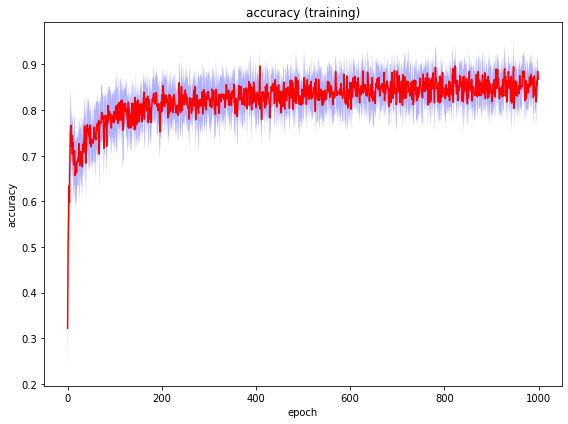

In [39]:
plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 100, weight decay = 0

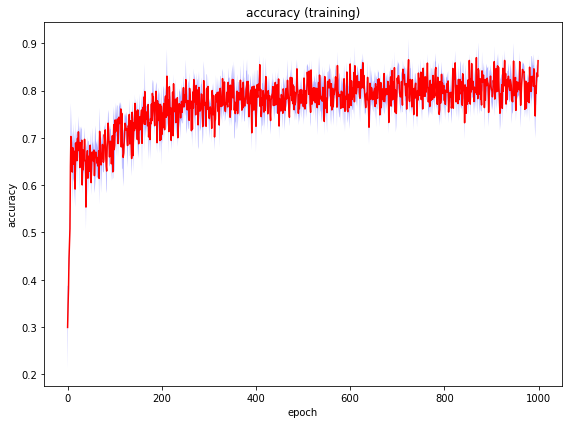

In [40]:
plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 200, weight decay = 0

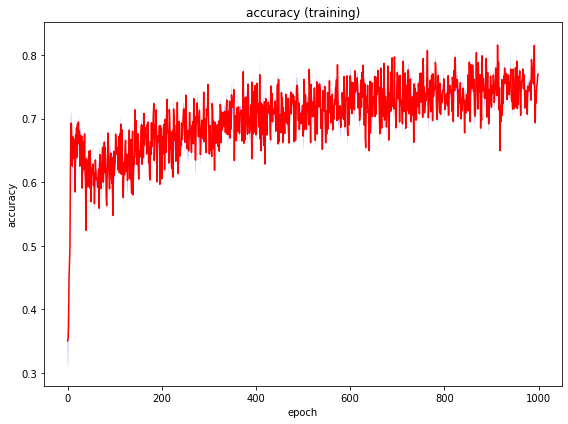

In [41]:
plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## loss (testing) curve with different mini-batch

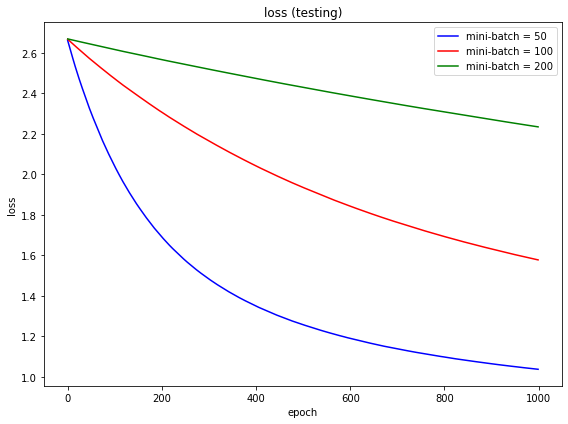

In [42]:
plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different mini-batch

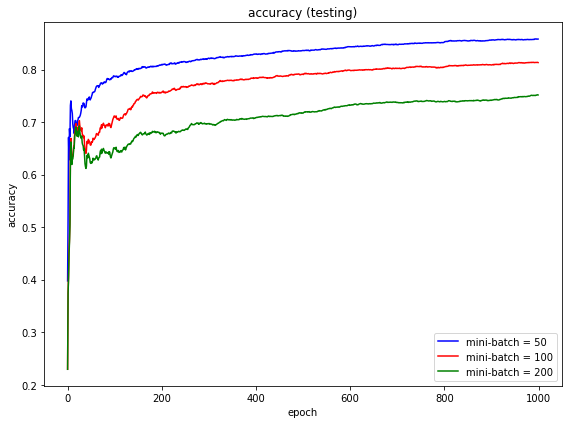

In [43]:
plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## loss (testing) curve with different weight-decay

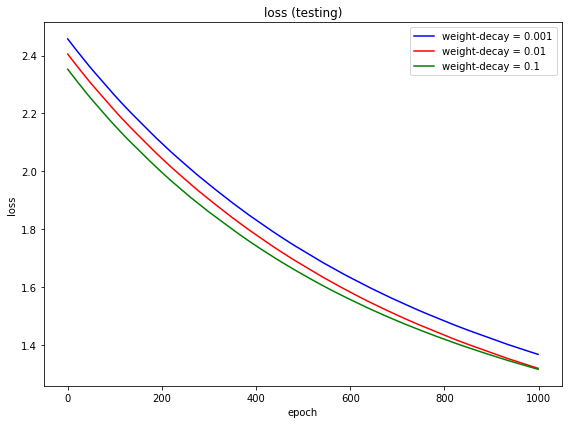

In [44]:
plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different weight-decay

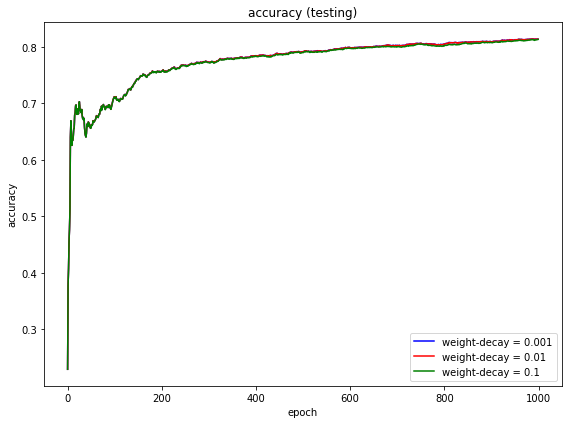

In [45]:
plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## print values

In [46]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [47]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss (mean) : mini-batch = 50, weight-decay = 0

In [48]:
print_curve(train_loss_mean_minibatch[0], index)

index =    0, value = 2.6632634658
index =  100, value = 2.0495497168
index =  200, value = 1.7113303508
index =  300, value = 1.5004546859
index =  400, value = 1.3567515958
index =  500, value = 1.2563175969
index =  600, value = 1.1612658985
index =  700, value = 1.0545756939
index =  800, value = 1.1020761083
index =  900, value = 1.0541377253


## training loss (mean) : mini-batch = 100, weight-decay = 0

In [49]:
print_curve(train_loss_mean_minibatch[1], index)

index =    0, value = 2.6671591519
index =  100, value = 2.4712554503
index =  200, value = 2.3342764917
index =  300, value = 2.1793505841
index =  400, value = 2.0497572248
index =  500, value = 1.9471686727
index =  600, value = 1.8178773951
index =  700, value = 1.6989075336
index =  800, value = 1.6789284313
index =  900, value = 1.6226810458


## training loss (mean) : mini-batch = 200, weight-decay = 0

In [50]:
print_curve(train_loss_mean_minibatch[2], index)

index =    0, value = 2.6684519954
index =  100, value = 2.6156720754
index =  200, value = 2.5755455115
index =  300, value = 2.5234010754
index =  400, value = 2.4753906551
index =  500, value = 2.4333654402
index =  600, value = 2.3832377712
index =  700, value = 2.3277714136
index =  800, value = 2.3070732831
index =  900, value = 2.2674692071


## training accuracy (mean) : mini-batch = 50, weight-decay = 0 

In [51]:
print_curve(train_accuracy_mean_minibatch[0], index)

index =    0, value = 0.3218500000
index =  100, value = 0.7837500000
index =  200, value = 0.7973500000
index =  300, value = 0.8283000000
index =  400, value = 0.8056000000
index =  500, value = 0.8282500000
index =  600, value = 0.8603000000
index =  700, value = 0.8855000000
index =  800, value = 0.8317000000
index =  900, value = 0.8437000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0

In [52]:
print_curve(train_accuracy_mean_minibatch[1], index)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7068500000
index =  300, value = 0.7449000000
index =  400, value = 0.7243500000
index =  500, value = 0.7675500000
index =  600, value = 0.8561000000
index =  700, value = 0.8262000000
index =  800, value = 0.7787500000
index =  900, value = 0.8022000000


## training accuracy (mean) : mini-batch = 200, weight-decay = 0

In [53]:
print_curve(train_accuracy_mean_minibatch[2], index)

index =    0, value = 0.3505000000
index =  100, value = 0.6223500000
index =  200, value = 0.6051000000
index =  300, value = 0.6814000000
index =  400, value = 0.6744500000
index =  500, value = 0.6723500000
index =  600, value = 0.7672500000
index =  700, value = 0.7721000000
index =  800, value = 0.7351500000
index =  900, value = 0.7178500000


## training loss (mean) : mini-batch = 100, weight-decay = 0.001

In [54]:
print_curve(train_loss_mean_weight_decay[0], index)

index =    0, value = 2.4578414714
index =  100, value = 2.2619249345
index =  200, value = 2.1249562913
index =  300, value = 1.9700627954
index =  400, value = 1.8405115570
index =  500, value = 1.7379668277
index =  600, value = 1.6087421205
index =  700, value = 1.4898315788
index =  800, value = 1.4698774882
index =  900, value = 1.4136504576


## training loss (mean) : mini-batch = 100, weight-decay = 0.01

In [55]:
print_curve(train_loss_mean_weight_decay[1], index)

index =    0, value = 2.4055138190
index =  100, value = 2.2095864946
index =  200, value = 2.0728153575
index =  300, value = 1.9183179900
index =  400, value = 1.7892501188
index =  500, value = 1.6872041571
index =  600, value = 1.5586825674
index =  700, value = 1.4404108351
index =  800, value = 1.4207873235
index =  900, value = 1.3648513022


## training loss (mean) : mini-batch = 100, weight-decay = 0.1

In [56]:
print_curve(train_loss_mean_weight_decay[2], index)

index =    0, value = 2.3531810955
index =  100, value = 2.1580858772
index =  200, value = 2.0242047185
index =  300, value = 1.8745406102
index =  400, value = 1.7511444799
index =  500, value = 1.6549115479
index =  600, value = 1.5341870949
index =  700, value = 1.4231359515
index =  800, value = 1.4076827945
index =  900, value = 1.3557127336


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.001

In [57]:
print_curve(train_accuracy_mean_weight_decay[0], index)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7068500000
index =  300, value = 0.7449000000
index =  400, value = 0.7243500000
index =  500, value = 0.7675500000
index =  600, value = 0.8558000000
index =  700, value = 0.8262000000
index =  800, value = 0.7787500000
index =  900, value = 0.8022000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.01

In [58]:
print_curve(train_accuracy_mean_weight_decay[1], index)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7068500000
index =  300, value = 0.7449000000
index =  400, value = 0.7243500000
index =  500, value = 0.7675500000
index =  600, value = 0.8533000000
index =  700, value = 0.8262000000
index =  800, value = 0.7787500000
index =  900, value = 0.8022000000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.1

In [59]:
print_curve(train_accuracy_mean_weight_decay[2], index)

index =    0, value = 0.2993500000
index =  100, value = 0.6846000000
index =  200, value = 0.7070000000
index =  300, value = 0.7450000000
index =  400, value = 0.7243500000
index =  500, value = 0.7673500000
index =  600, value = 0.8499000000
index =  700, value = 0.8262000000
index =  800, value = 0.7886000000
index =  900, value = 0.8022000000


## function definition for presenting the results

In [60]:
def function_results_01(*args):
    index_class_plot = index_train[0][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [61]:
def function_results_02(*args):
    index_class_plot = index_train[1][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [62]:
def function_results_03(*args):
    index_class_plot = index_train[2][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [63]:
def function_results_04(*args):
    index_class_plot = index_train[3][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [64]:
def function_results_05(*args):
    index_class_plot = index_train[4][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [65]:
def function_results_06(*args):
    index_class_plot = index_train[5][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [66]:
def function_results_07(*args):
    index_class_plot = index_train[6][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [67]:
def function_results_08(*args):
    index_class_plot = index_train[7][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [68]:
def function_results_09(*args):
    index_class_plot = index_train[8][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [69]:
def function_results_10(*args):
    index_class_plot = index_train[9][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)    
    pass

In [70]:
def function_results_11(*args):
    plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')
    pass

In [71]:
def function_results_12(*args):
    plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')
    pass

In [85]:
def function_results_13(*args):
    plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')
    pass

In [86]:
def function_results_14(*args):
    plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')
    pass

In [82]:
def function_results_15(*args):
    plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')
    pass

In [74]:
def function_results_16(*args):
    plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')
    pass

In [75]:
def function_results_17(*args):
    plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')
    pass

In [76]:
def function_results_18(*args):
    plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')
    pass

In [77]:
def function_results_19(*args):
    plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')
    pass

In [78]:
def function_results_20(*args):
    plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')
    pass

In [83]:
def function_results_21(*args):
     print_curve(train_loss_mean_minibatch[1], index)
     pass

In [87]:
def function_results_22(*args):
    print_curve(train_accuracy_mean_minibatch[1], index)
    pass

In [91]:
def function_results_23(*args):
    print_curve(train_loss_mean_weight_decay[0], index)
    pass

In [89]:
def function_results_24(*args):
    print_curve(train_accuracy_mean_weight_decay[0], index) 
    pass

---

# RESULTS

---

## # 01. plot the input images for '0'

In [ ]:
function_results_01(...)

## # 02. plot the input images for '1'

In [ ]:
function_results_02(...)

## # 03. plot the input images for '2'

In [ ]:
function_results_03(...)

## # 04. plot the input images for '3'

In [ ]:
function_results_04(...)

## # 05. plot the input images for '4'

In [ ]:
function_results_05(...)

## # 06. plot the input images for '5'

In [ ]:
function_results_06(...)

## # 07. plot the input images for '6'

In [ ]:
function_results_07(...)

## # 08. plot the input images for '7'

In [ ]:
function_results_08(...)

## # 09. plot the input images for '8'

In [ ]:
function_results_09(...)

## # 10. plot the input images for '9'

In [ ]:
function_results_10(...)

## # 11. plot loss (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

In [ ]:
function_results_11(...)

## # 12. plot loss (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

In [ ]:
function_results_12(...)

## # 13. plot loss (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

In [ ]:
function_results_13(...)

## # 14. plot accuracy (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

In [ ]:
function_results_14(...)

## # 15. plot accuracy (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

In [ ]:
function_results_15(...)

## # 16. plot accuracy (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

In [ ]:
function_results_16(...)

## # 17. plot loss (testing) curve (mean) with different mini-batch

In [ ]:
function_results_17(...)

## # 18. plot accuracy (testing) curve (mean) with different mini-batch

In [ ]:
function_results_18(...)

## # 19. plot loss (testing) curve (mean) with different weight-decay

In [ ]:
function_results_19(...)

## # 20. plot accuracy (testing) curve (mean) with different weight-decay

In [ ]:
function_results_20(...)

## # 21. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_21(...)

## # 22. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_22(...)

## # 23. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_23(...)

## # 24. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_24(...)